# Load Data and Initial Exploration

In [23]:
import pandas as pd

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display basic information about each dataset
print("Customers Dataset:")
print(customers.head())
print(customers.info())

print("\nProducts Dataset:")
print(products.head())
print(products.info())

print("\nTransactions Dataset:")
print(transactions.head())
print(transactions.info())


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving 

# Convert date columns to datetime

In [2]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Confirm the changes
print(customers.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6 

# Analyze Unique Values and Signup Trends

In [4]:
# Analyze unique regions and categories
print("Unique Regions in Customers Dataset:")
print(customers['Region'].unique())

print("\nUnique Categories in Products Dataset:")
print(products['Category'].unique())

# Analyze signups by region
signup_region = customers['Region'].value_counts()
print("\nNumber of Signups by Region:")
print(signup_region)


Unique Regions in Customers Dataset:
['South America' 'Asia' 'North America' 'Europe']

Unique Categories in Products Dataset:
['Books' 'Electronics' 'Home Decor' 'Clothing']

Number of Signups by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


# Analyze transactions over time


In [5]:
transactions_over_time = transactions['TransactionDate'].dt.date.value_counts().sort_index()
print("\nTransactions Over Time:")
print(transactions_over_time)



Transactions Over Time:
TransactionDate
2023-12-30    1
2023-12-31    3
2024-01-01    4
2024-01-02    4
2024-01-03    4
             ..
2024-12-24    3
2024-12-25    4
2024-12-26    6
2024-12-27    2
2024-12-28    1
Name: count, Length: 337, dtype: int64


# Visualization: Signups by Region and Transactions Over Time



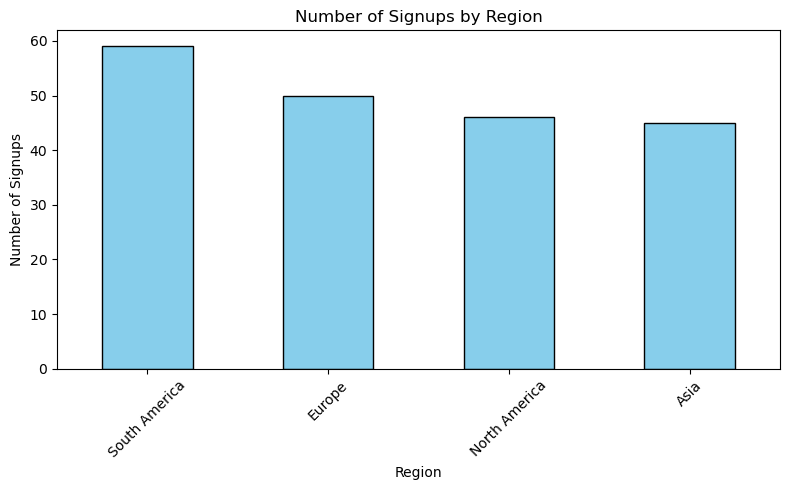

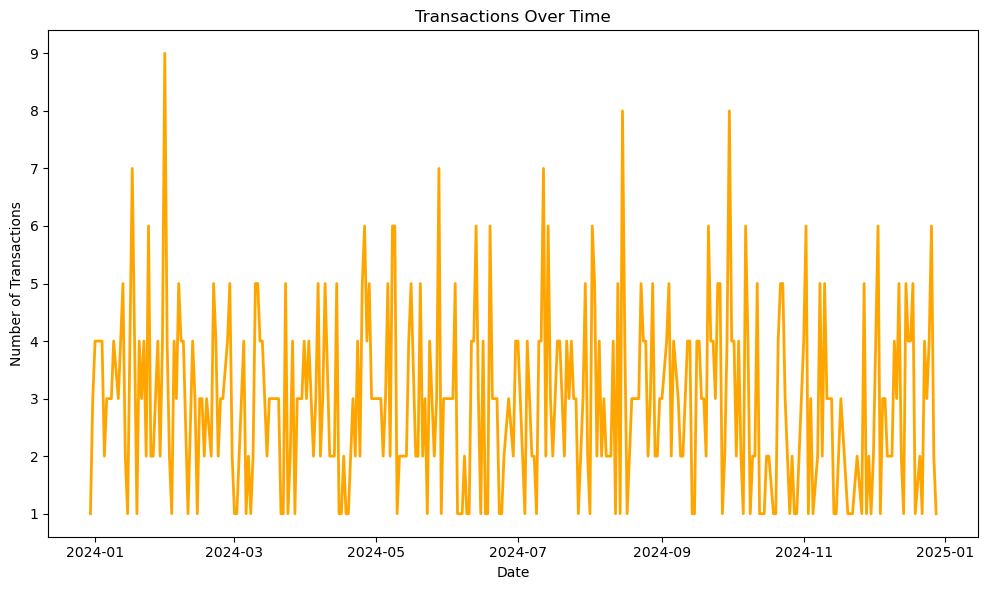

In [6]:
import matplotlib.pyplot as plt

# Bar chart: Signups by region
plt.figure(figsize=(8, 5))
signup_region.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Signups by Region')
plt.xlabel('Region')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line plot: Transactions over time
plt.figure(figsize=(10, 6))
transactions_over_time.plot(kind='line', color='orange', linewidth=2)
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()


# Merge Datasets and Analyze Product Sales

In [7]:
# Merge datasets
merged_data = pd.merge(transactions, products, on='ProductID', how='left')

# Total sales per product
total_sales = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)

# Total transaction value per product
total_value_per_product = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)


# Visualization: Product Sales Analysis

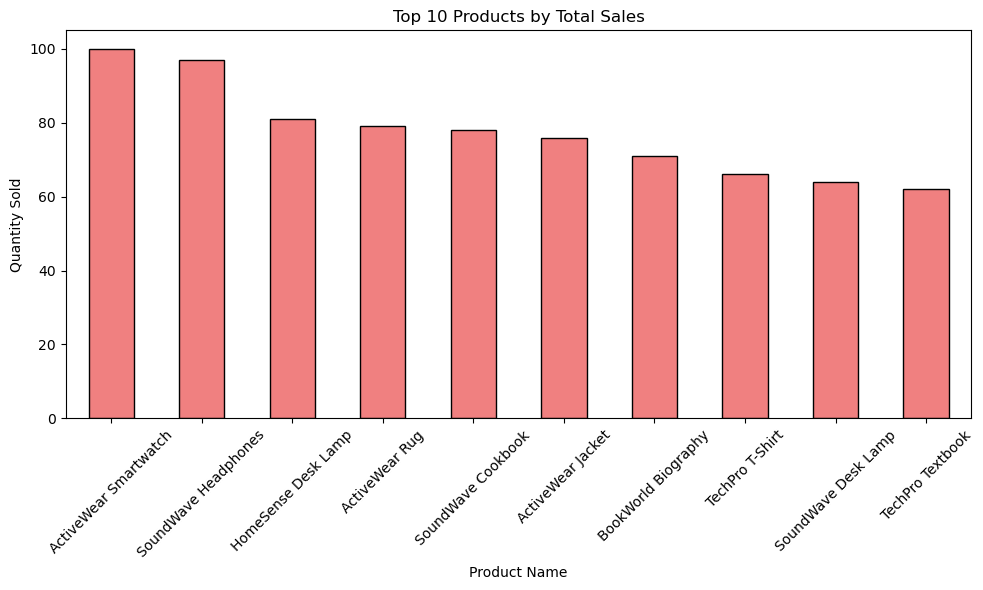

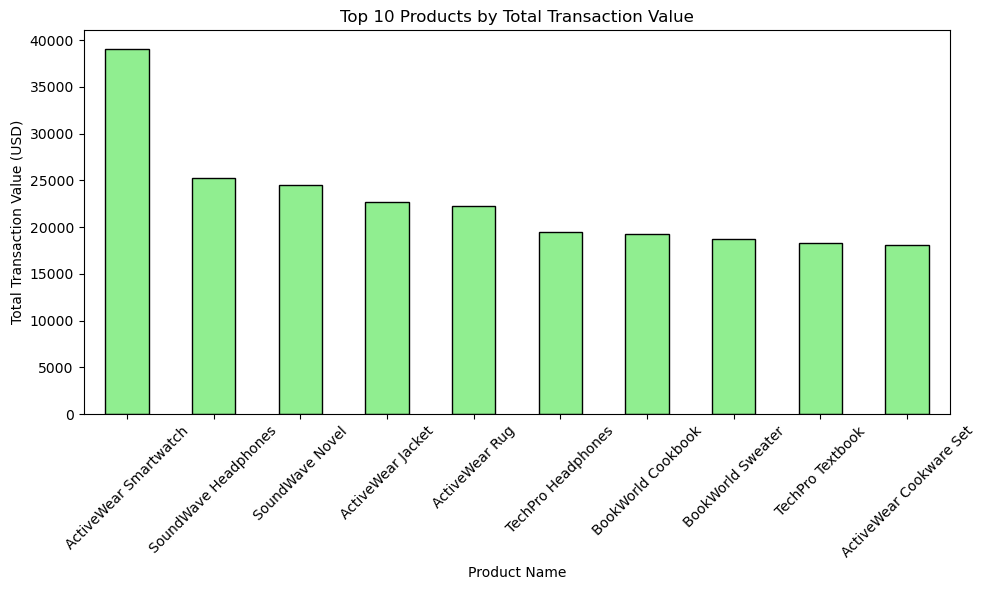

In [8]:
# Plot: Total sales per product (bar chart)
plt.figure(figsize=(10, 6))
total_sales.head(10).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot: Total transaction value per product (bar chart)
plt.figure(figsize=(10, 6))
total_value_per_product.head(10).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Products by Total Transaction Value')
plt.xlabel('Product Name')
plt.ylabel('Total Transaction Value (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Customer, Product, and Regional Spending Analysis

In [9]:
# Merge all datasets
merged_df = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_df = pd.merge(merged_df, products, on='ProductID', how='left')

# Customer spending
customer_spending = merged_df.groupby('CustomerID')['TotalValue'].sum().reset_index().sort_values(by='TotalValue', ascending=False)
print(customer_spending.head())

# Regional spending
region_spending = merged_df.groupby('Region')['TotalValue'].sum().reset_index()
print(region_spending)


    CustomerID  TotalValue
140      C0141    10673.87
53       C0054     8040.39
64       C0065     7663.70
155      C0156     7634.45
81       C0082     7572.91
          Region  TotalValue
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56


# Monthly Sales Trend Analysis

YearMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


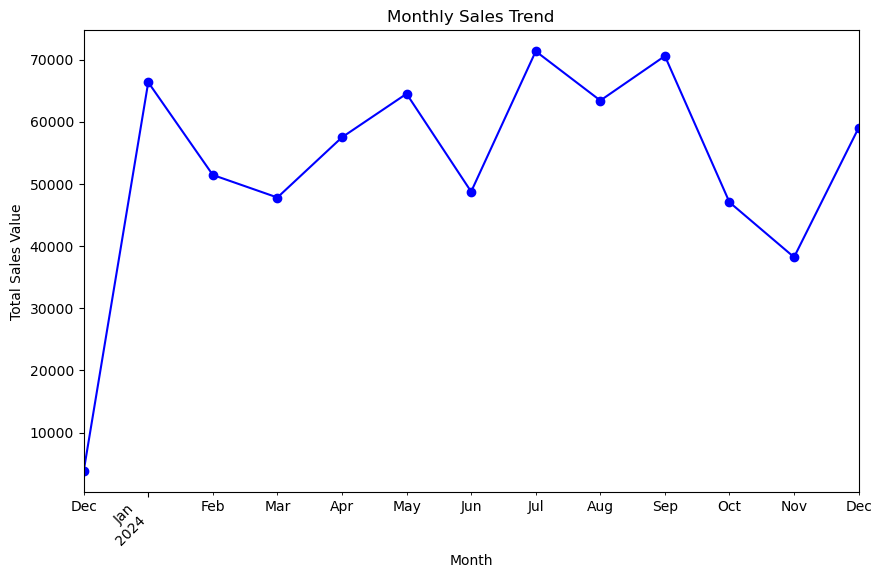

In [10]:
# Extract YearMonth from TransactionDate
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['YearMonth'] = merged_df['TransactionDate'].dt.to_period('M')

# Monthly sales
monthly_sales = merged_df.groupby('YearMonth')['TotalValue'].sum()
print(monthly_sales)

# Line plot: Monthly sales trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', color='blue', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45, ha='right')
plt.show()


# Correlation Analysis of Numerical Variables

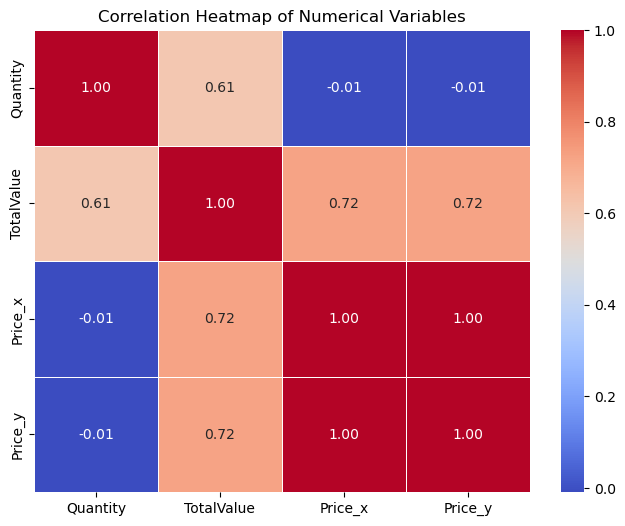

In [11]:
import seaborn as sns

# Select numerical columns
numerical_columns = ['Quantity', 'TotalValue', 'Price_x', 'Price_y']
correlation_matrix = merged_df[numerical_columns].corr()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()
